In [3]:
from Constant import Constant
from Moment import Moment
from Team import Team
from Game import Game
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle, Rectangle, Arc

In [7]:
game = Game('data/game.json')
game.read_json()

loading  452


In [20]:
! rm vid.gif

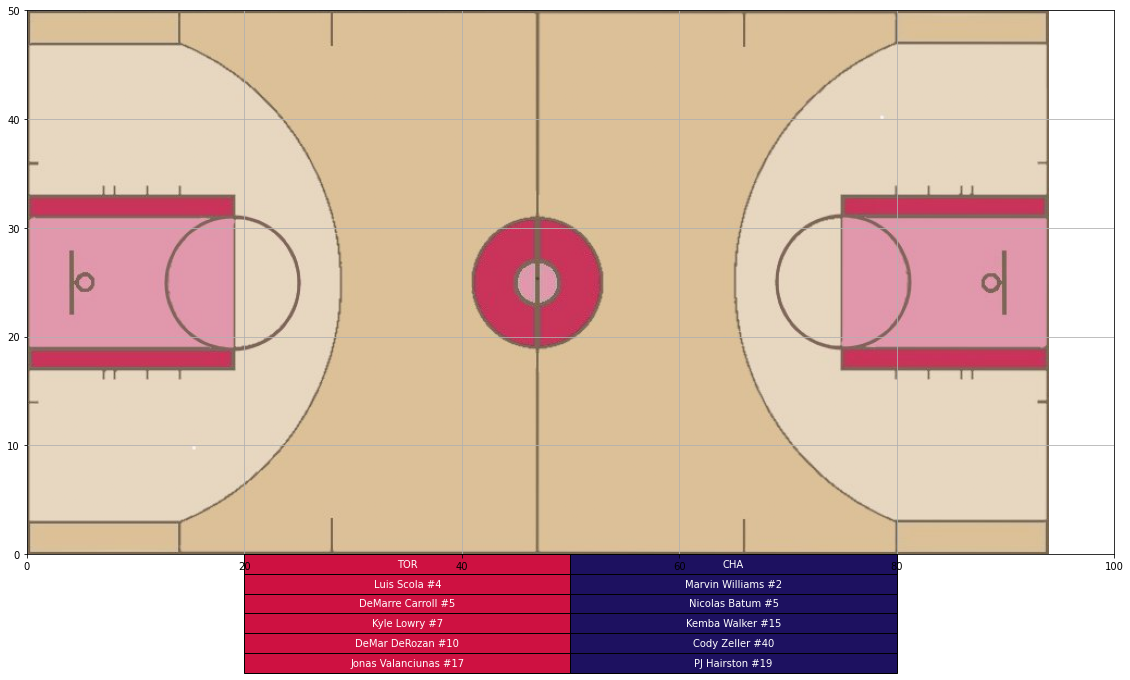

In [91]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

class BasketballAnimation():
    def __init__(self, x, t, game):
        self.fig = plt.figure(figsize=(20, 10))
        self.ax = plt.axes(xlim=(Constant.X_MIN, Constant.X_MAX),
                           ylim=(Constant.Y_MIN, Constant.Y_MAX))
        # self.ax.axis('off')
        self.ax.grid(True, 'both')
        
        start_moment = game.events[0].moments[0]
        player_dict = game.player_ids_dict

        clock_info = ax.annotate('', xy=[Constant.X_CENTER, Constant.Y_CENTER],
                                 color='black', horizontalalignment='center',
                                 verticalalignment='center')

        annotations = [ax.annotate(game.player_ids_dict[player.id][1], xy=[0, 0], color='w',
                                   horizontalalignment='center',
                                   verticalalignment='center', fontweight='bold')
                       for player in start_moment.players]

        # Prepare table
        sorted_players = sorted(start_moment.players, key=lambda player: player.team.id)
        
        home_player = sorted_players[0]
        guest_player = sorted_players[5]
        column_labels = tuple([home_player.team.name, guest_player.team.name])
        column_colours = tuple([home_player.team.color, guest_player.team.color])
        cell_colours = [column_colours for _ in range(5)]
        
        home_players = [' #'.join([player_dict[player.id][0], player_dict[player.id][1]]) for player in sorted_players[:5]]
        guest_players = [' #'.join([player_dict[player.id][0], player_dict[player.id][1]]) for player in sorted_players[5:]]
        players_data = list(zip(home_players, guest_players))

        table = plt.table(cellText=players_data,
                          colLabels=column_labels,
                          colColours=column_colours,
                          colWidths=[Constant.COL_WIDTH, Constant.COL_WIDTH],
                          loc='bottom',
                          cellColours=cell_colours,
                          fontsize=Constant.FONTSIZE,
                          cellLoc='center')
        table.scale(1, Constant.SCALE)
        for cell in table.get_celld().values():
            cell.set_text_props(c='white')

        player_circles = [plt.Circle((0, 0), Constant.PLAYER_CIRCLE_SIZE, color=player.color)
                          for player in start_moment.players]
        ball_circle = plt.Circle((0, 0), Constant.PLAYER_CIRCLE_SIZE,
                                 color=start_moment.ball.color)
        self.line, = self.ax.plot([], [], lw=3)
        
        for circle in player_circles:
            ax.add_patch(circle)
        ax.add_patch(ball_circle)

        # anim = animation.FuncAnimation(
        #                  fig, self.update_radius,
        #                  fargs=(player_circles, ball_circle, annotations, clock_info),
        #                  frames=len(self.moments), interval=Constant.INTERVAL)
        court = plt.imread("court.png")
        plt.imshow(court, zorder=0, extent=[Constant.X_MIN, Constant.X_MAX - Constant.DIFF,
                                            Constant.Y_MAX, Constant.Y_MIN])
        # plt.show()
        
        # self.anim = FuncAnimation(self.fig, self.animation_step, init_func=self.animation_init, frames=200, interval=20, blit=True)
        # self.anim.save('vid.gif', writer='imagemagick')
        # plt.close()
        self.table = table

    def animation_init(self):
        self.line.set_data([], [])
        return self.line,
    
    def animation_step(self, i):
        x = np.linspace(0, 4, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        self.line.set_data(x, y)
        return self.line,
    
    def update_radius(self, i, player_circles, ball_circle, annotations, clock_info):
        moment = self.moments[i]
        for j, circle in enumerate(player_circles):
            circle.center = moment.players[j].x, moment.players[j].y
            annotations[j].set_position(circle.center)
            clock_test = 'Quarter {:d}\n {:02d}:{:02d}\n {:03.1f}'.format(
                         moment.quarter,
                         int(moment.game_clock) % 3600 // 60,
                         int(moment.game_clock) % 60,
                         moment.shot_clock)
            clock_info.set_text(clock_test)
        ball_circle.center = moment.ball.x, moment.ball.y
        ball_circle.radius = moment.ball.radius / Constant.NORMALIZATION_COEF
        return player_circles, ball_circle
    
a = BasketballAnimation(None, None, game)

In [45]:
# game.player_ids_dict

KeyError: 'child_artists'

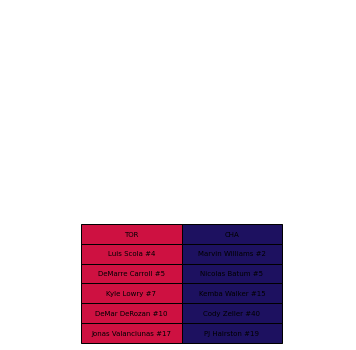

In [24]:
game.events[0].show()

In [ ]:

class Event:
    """A class for handling and showing events"""

    def __init__(self, event):
        moments = event['moments']
        self.moments = [Moment(moment) for moment in moments]
        home_players = event['home']['players']
        guest_players = event['visitor']['players']
        players = home_players + guest_players
        player_ids = [player['playerid'] for player in players]
        player_names = [" ".join([player['firstname'],
                        player['lastname']]) for player in players]
        player_jerseys = [player['jersey'] for player in players]
        values = list(zip(player_names, player_jerseys))
        # Example: 101108: ['Chris Paul', '3']
        self.player_ids_dict = dict(zip(player_ids, values))



In [99]:
game.events[0].moments[0].players[0]